<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221101_3_Chap_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# p262 LSTM을 이용한 로이터 뉴스 카테고리 분류하기
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [ ]:
category = np.max(y_train) + 1
print("종류 : ", category)
print("Train data : ", len(X_train))
print("Test data : ", len(X_test))

종류 :  46
Train data :  8982
Test data :  2246


In [ ]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
print(len(X_train[0]))

87


In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [ ]:
y_train = to_categorical(y_train) #원-핫 인코딩
y_test = to_categorical(y_test)

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(1000, 100)) #1000차원을 100차원으로
model.add(layers.LSTM(100, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 1. (1000) * (100) / total = 100000
# LSTM 이전층 출력(((입력값) + 출력값 ) * 출력값) + 출력값 ) * 전체가 4개 
# 2. (((100 + 100) * 100) + 100 ) + 게이트숫자4 = 80400
# 3. (100) * 46 + b46 = 4646

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200,
                   validation_data=(X_test, y_test),
                   callbacks=[early_stopping])

Epoch 1/200
450/450 [==============================] - 18s 35ms/step - loss: 2.1280 - accuracy: 0.4503 - val_loss: 1.8227 - val_accuracy: 0.5209
Epoch 2/200
450/450 [==============================] - 15s 34ms/step - loss: 1.7049 - accuracy: 0.5586 - val_loss: 1.6576 - val_accuracy: 0.5815
Epoch 3/200
450/450 [==============================] - 15s 32ms/step - loss: 1.5764 - accuracy: 0.5962 - val_loss: 1.5503 - val_accuracy: 0.6086
Epoch 4/200
450/450 [==============================] - 15s 33ms/step - loss: 1.4195 - accuracy: 0.6362 - val_loss: 1.4890 - val_accuracy: 0.6158
Epoch 5/200
450/450 [==============================] - 15s 34ms/step - loss: 1.2740 - accuracy: 0.6739 - val_loss: 1.3144 - val_accuracy: 0.6638
Epoch 6/200
450/450 [==============================] - 15s 34ms/step - loss: 1.1439 - accuracy: 0.7093 - val_loss: 1.2542 - val_accuracy: 0.6794
Epoch 7/200
450/450 [==============================] - 15s 34ms/step - loss: 1.0443 - accuracy: 0.7352 - val_loss: 1.2223 - val_ac

In [ ]:
print('Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 10ms/step - loss: 1.2760 - accuracy: 0.7222
Test Accuracy : 0.7222


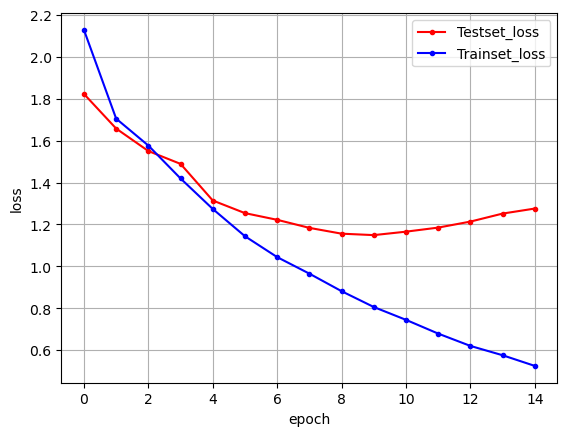

In [ ]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()